# **CNN Model**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 15/10/2022*

*Last updated: 27/11/2022*

---

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib as mpl
from joblib import dump, load

In [2]:
# RUN ONLY FOR GOOGLE COLAB

from google.colab import drive

drive.mount("/content/gdrive")  

%cd "/content/gdrive/MyDrive/Colab Notebooks"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [3]:
smote = False

In [4]:
# Obtaining the train and test dataset
x_test = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/test/x_test.csv')
y_test = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/test/y_test.csv')

In [5]:
if smote:
    x_train = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/train/x_train.csv')
    y_train = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/train/y_train.csv')
else:    
    # Dividing the train dataset
    train = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/train/original_train.csv')
    x_train = train.drop(['Churn'], axis=1)
    y_train = pd.DataFrame(train['Churn'])

In [6]:
# Defining the model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1],1)))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.LeakyReLU())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.LeakyReLU())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(2))

In [7]:
# Training the model 
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn_model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
155/155 [==============================] - 10s 7ms/step - loss: 0.5342 - accuracy: 0.7299 - val_loss: 0.4885 - val_accuracy: 0.7557
Epoch 2/10
155/155 [==============================] - 1s 4ms/step - loss: 0.5049 - accuracy: 0.7431 - val_loss: 0.4838 - val_accuracy: 0.7448
Epoch 3/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4987 - accuracy: 0.7475 - val_loss: 0.4755 - val_accuracy: 0.7604
Epoch 4/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4971 - accuracy: 0.7570 - val_loss: 0.4796 - val_accuracy: 0.7604
Epoch 5/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4872 - accuracy: 0.7560 - val_loss: 0.4685 - val_accuracy: 0.7680
Epoch 6/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4867 - accuracy: 0.7658 - val_loss: 0.4681 - val_accuracy: 0.7704
Epoch 7/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4874 - accuracy: 0.7639 - val_loss: 0.4633 - val_accuracy: 0.7694
Epoch

In [8]:
y_pred = cnn_model.predict(x_test)
y_pred = (y_pred[:,1] >= y_pred[:,0]).astype(int)

cm = tf.math.confusion_matrix(y_test, y_pred).numpy()
pd.DataFrame(cm)

66/66 [==============================] - 0s 2ms/step


,0,1
0,1413,157
1,325,217


In [9]:
predicted_true_positive_percentage = cm[1,1] / (cm[1,1] + cm[0,1])
predicted_true_negative_percentage = cm[0,0] / (cm[0,0] + cm[1,0])
# Saving the general aspects in a df
d = {'predicted_true_positive_percentage': [predicted_true_positive_percentage], 'predicted_true_negative_percentage': [predicted_true_negative_percentage]}
true_predicted_percentage = pd.DataFrame(data=d)
# dump(true_predicted_percentage, f"./true_predicted_percentage.joblib")
true_predicted_percentage

,predicted_true_positive_percentage,predicted_true_negative_percentage
0,0.580214,0.813003


In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 128)            512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 128)           0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 128)            0         
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 dense (Dense)               (None, 1, 32)             4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1, 32)             0         
                                                        

66/66 - 0s - loss: 0.4665 - accuracy: 0.7718 - 140ms/epoch - 2ms/step
0.7717803120613098


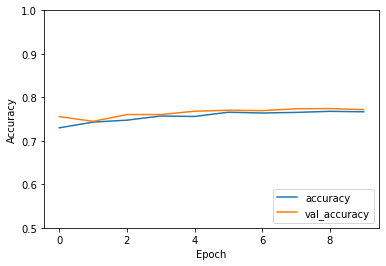

In [11]:
# Plotting the accuracy of the training (train and validation)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

In [12]:
# Calculating the MSE and accuracy in the training and test

# Train MSE and Accuracy
train_loss, train_acc = cnn_model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)

print(f'MSE Train: {1-train_acc}')
print(f'Accuracy Train: {train_acc}')

# Test MSE and Accuracy
print(f'MSE Test: {1-test_acc}')
print(f'Accuracy Test: {test_acc}')

155/155 - 1s - loss: 0.4663 - accuracy: 0.7808 - 575ms/epoch - 4ms/step
66/66 - 0s - loss: 0.4665 - accuracy: 0.7718 - 144ms/epoch - 2ms/step
MSE Train: 0.21922528743743896
Accuracy Train: 0.780774712562561
MSE Test: 0.22821968793869019
Accuracy Test: 0.7717803120613098


### ***Improving the model***

In [13]:
# Improving the model
cnn_improved_model = models.Sequential()
cnn_improved_model.add(layers.Conv1D(32, 2, activation='relu', input_shape=(x_train.shape[1],1)))
cnn_improved_model.add(layers.Dense(16, activation='relu'))
cnn_improved_model.add(layers.MaxPooling1D(1))
cnn_model.add(layers.Dropout(0.3))
cnn_improved_model.add(layers.Conv1D(16, 2, activation='relu'))
cnn_improved_model.add(layers.Flatten())
cnn_improved_model.add(layers.Dense(16, activation='relu'))
cnn_improved_model.add(layers.Dense(2))

In [14]:
# Training the model 
cnn_improved_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn_improved_model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
155/155 [==============================] - 2s 6ms/step - loss: 0.5554 - accuracy: 0.7098 - val_loss: 0.4670 - val_accuracy: 0.7680
Epoch 2/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4536 - accuracy: 0.7891 - val_loss: 0.4603 - val_accuracy: 0.7784
Epoch 3/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4481 - accuracy: 0.7931 - val_loss: 0.4546 - val_accuracy: 0.7770
Epoch 4/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4429 - accuracy: 0.7917 - val_loss: 0.4516 - val_accuracy: 0.7789
Epoch 5/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4417 - accuracy: 0.7919 - val_loss: 0.4498 - val_accuracy: 0.7803
Epoch 6/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4410 - accuracy: 0.7936 - val_loss: 0.4511 - val_accuracy: 0.7822
Epoch 7/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4410 - accuracy: 0.7942 - val_loss: 0.4489 - val_accuracy: 0.7779
Epoch 

In [15]:
y_pred = cnn_improved_model.predict(x_test)
y_pred = (y_pred[:,1] >= y_pred[:,0]).astype(int)

cm = tf.math.confusion_matrix(y_test, y_pred).numpy()
confusion_matrix = pd.DataFrame(cm)
dump(confusion_matrix, f"./confusion_matrix.joblib")
confusion_matrix

66/66 [==============================] - 0s 2ms/step


,0,1
0,1389,181
1,294,248


In [16]:
predicted_true_positive_percentage = cm[1,1] / (cm[1,1] + cm[0,1])
predicted_true_negative_percentage = cm[0,0] / (cm[0,0] + cm[1,0])
# Saving the general aspects in a df
d = {'predicted_true_positive_percentage': [predicted_true_positive_percentage], 'predicted_true_negative_percentage': [predicted_true_negative_percentage]}
true_predicted_percentage = pd.DataFrame(data=d)
dump(true_predicted_percentage, f"./true_predicted_percentage.joblib")
true_predicted_percentage

,predicted_true_positive_percentage,predicted_true_negative_percentage
0,0.578089,0.825312


In [17]:
cnn_improved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 32)             96        
                                                                 
 dense_3 (Dense)             (None, 4, 16)             528       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 16)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 16)             528       
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                784       
                                                      

66/66 - 0s - loss: 0.4478 - accuracy: 0.7751 - 142ms/epoch - 2ms/step
0.7750946879386902


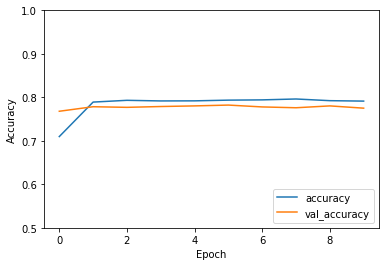

In [18]:
# Plotting the accuracy of the training (train and validation)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn_improved_model.evaluate(x_test, y_test, verbose=2)
print(test_acc)



In [19]:
# Calculating the MSE and accuracy in the training and test

# Train MSE and Accuracy
train_loss, train_acc = cnn_improved_model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = cnn_improved_model.evaluate(x_test, y_test, verbose=2)

print(f'MSE Train: {1-train_acc}')
print(f'Accuracy Train: {train_acc}')

# Test MSE and Accuracy
print(f'MSE Test: {1-test_acc}')
print(f'Accuracy Test: {test_acc}')

155/155 - 1s - loss: 0.4333 - accuracy: 0.7976 - 513ms/epoch - 3ms/step
66/66 - 0s - loss: 0.4478 - accuracy: 0.7751 - 125ms/epoch - 2ms/step
MSE Train: 0.20239299535751343
Accuracy Train: 0.7976070046424866
MSE Test: 0.22490531206130981
Accuracy Test: 0.7750946879386902


In [20]:
if smote:
    dump(cnn_improved_model, "./cnn_model_smote.joblib")
else:
    dump(cnn_improved_model, "./cnn_model.joblib")